## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

## Importing Dataset

In [3]:
df1 = pd.read_csv('loan_data.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y


In [4]:
df1.shape

(381, 13)

In [5]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


## Checking Duplicates

In [7]:
df1.duplicated().sum()

0

## Handling Missing Values

In [8]:
df1.isnull().sum()/len(df1)*100

Loan_ID             0.000000
Gender              1.312336
Married             0.000000
Dependents          2.099738
Education           0.000000
Self_Employed       5.511811
ApplicantIncome     0.000000
CoapplicantIncome   0.000000
LoanAmount          0.000000
Loan_Amount_Term    2.887139
Credit_History      7.874016
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64

In [9]:
df1 = df1.drop('Loan_ID', axis= 1)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

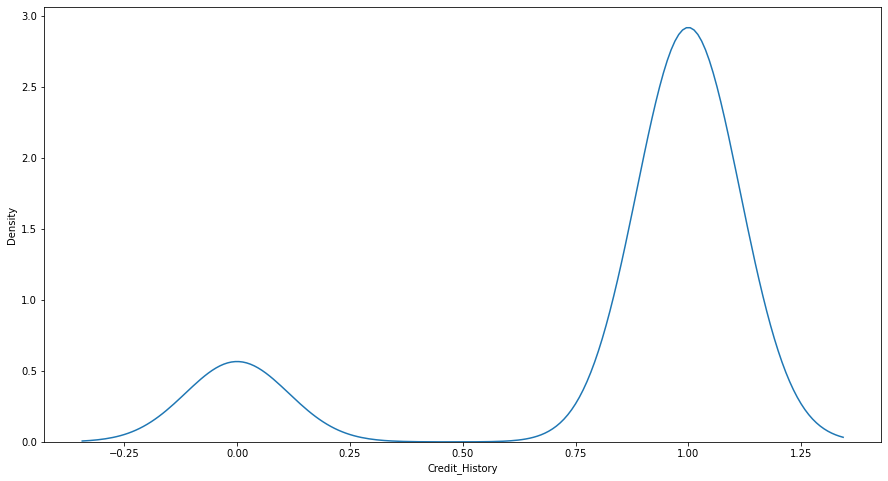

In [10]:
sns.kdeplot('Credit_History', data= df1)

In [11]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].median())

In [12]:
df1.isnull().sum()/len(df1)*100

Gender              1.312336
Married             0.000000
Dependents          2.099738
Education           0.000000
Self_Employed       5.511811
ApplicantIncome     0.000000
CoapplicantIncome   0.000000
LoanAmount          0.000000
Loan_Amount_Term    0.000000
Credit_History      0.000000
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64

In [13]:
df1['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [14]:
df1['Dependents'] = df1['Dependents'].replace(['0','1','2','3+'], [0,1,2,3,])

In [15]:
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode().iloc[0])

In [16]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode().iloc[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode().iloc[0])

In [17]:
df1.isnull().sum()/len(df1)*100

Gender              0.000000
Married             0.000000
Dependents          0.000000
Education           0.000000
Self_Employed       0.000000
ApplicantIncome     0.000000
CoapplicantIncome   0.000000
LoanAmount          0.000000
Loan_Amount_Term    0.000000
Credit_History      0.000000
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64

## Checking The Target Variable

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

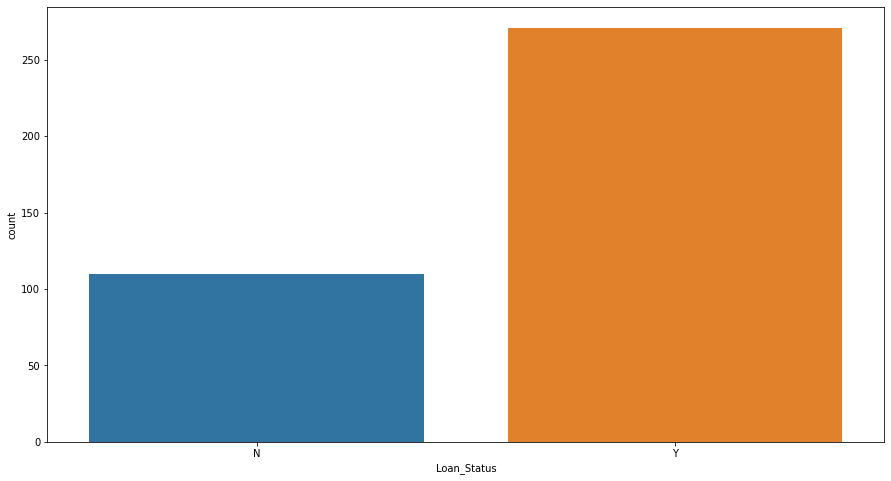

In [18]:
sns.countplot(x= 'Loan_Status', data= df1)

<AxesSubplot:>

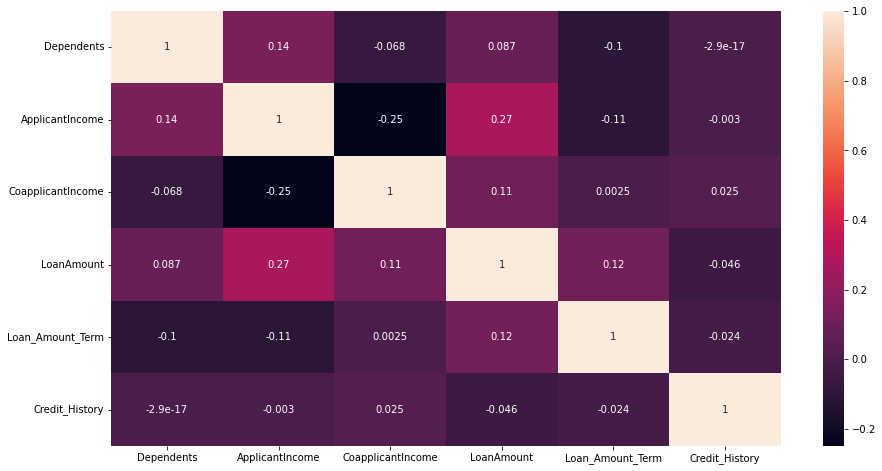

In [19]:
sns.heatmap(df1.corr(), annot= True)

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

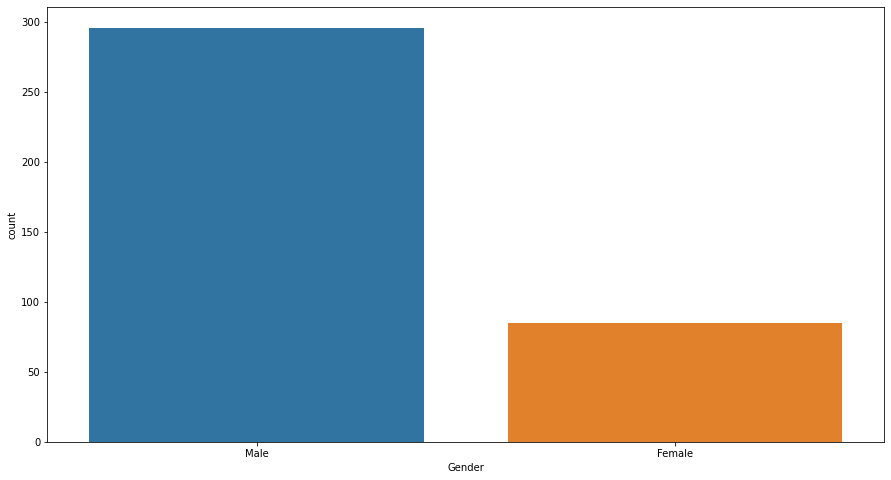

In [20]:
sns.countplot(x= 'Gender', data= df1)

<AxesSubplot:xlabel='Married', ylabel='count'>

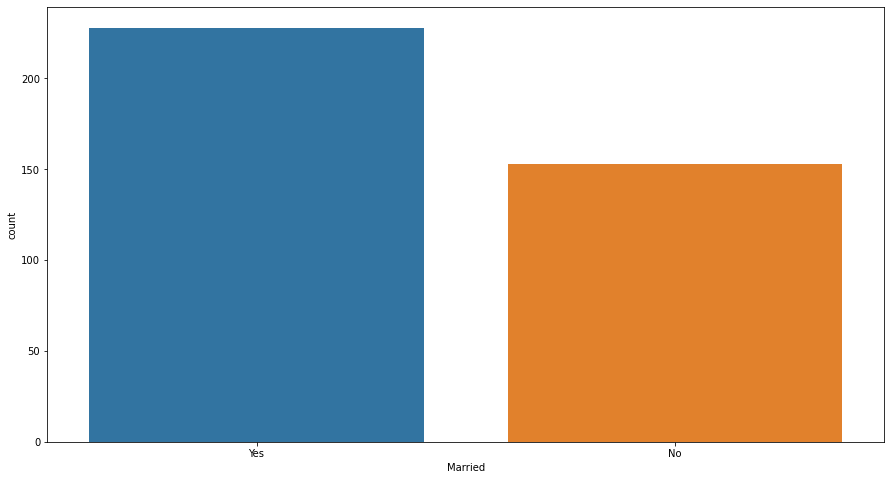

In [21]:
sns.countplot(x= 'Married', data= df1)

<AxesSubplot:xlabel='Education', ylabel='count'>

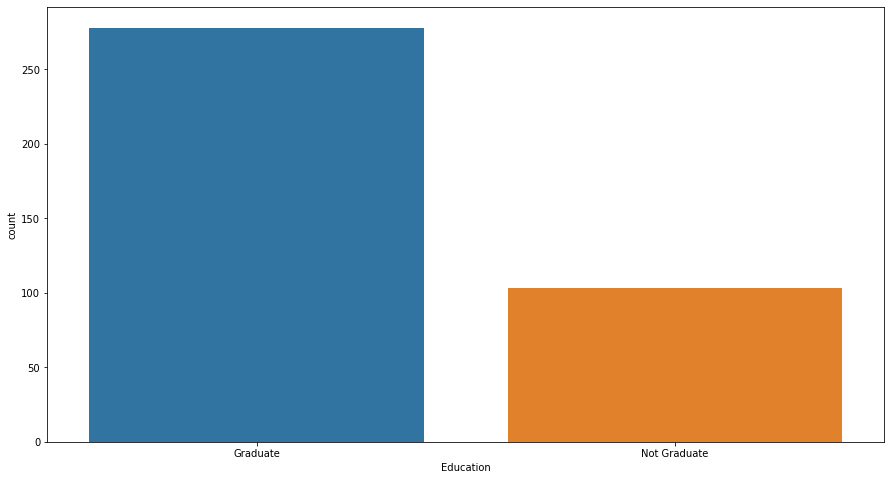

In [22]:
sns.countplot(x= 'Education', data= df1)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

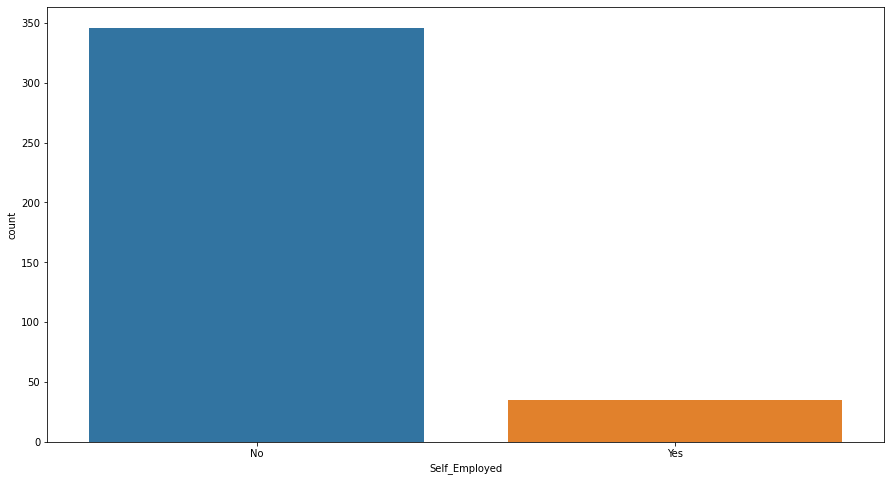

In [23]:
sns.countplot(x= 'Self_Employed', data= df1)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

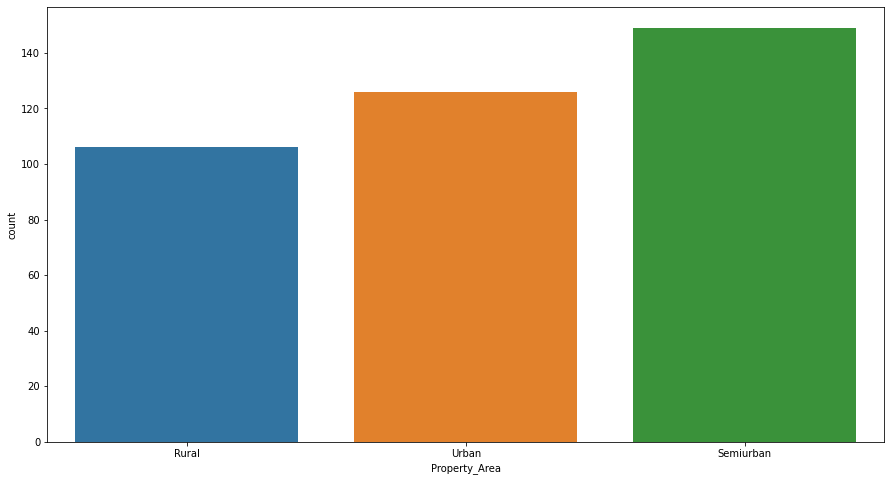

In [24]:
sns.countplot(x = 'Property_Area', data= df1)

### Bivariate Analysis

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

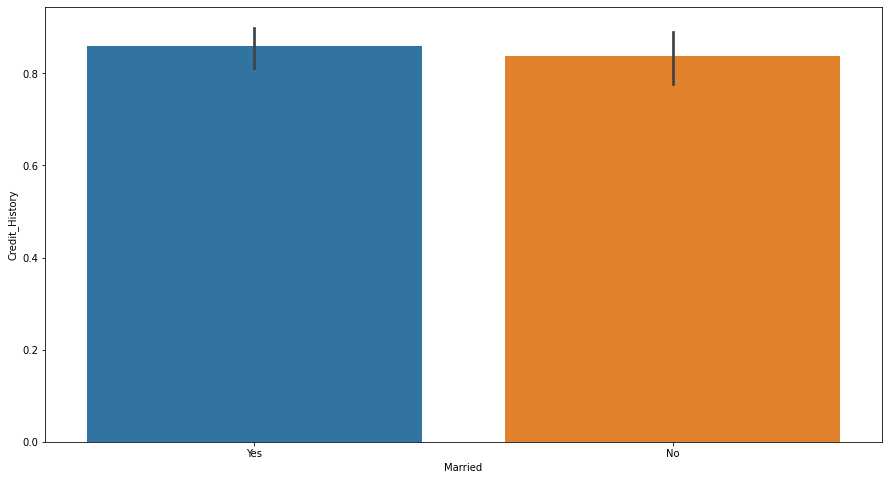

In [25]:
sns.barplot(x= 'Married', y= 'Credit_History', data= df1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

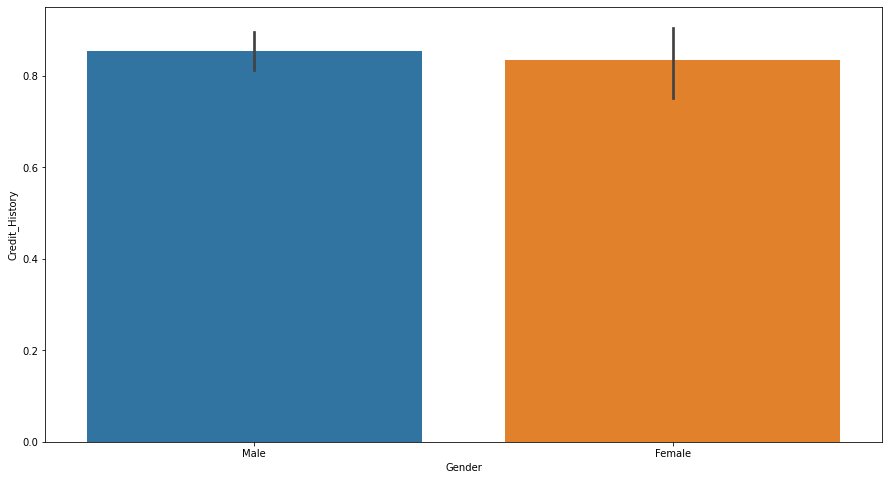

In [26]:
sns.barplot(x= 'Gender', y= 'Credit_History', data= df1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

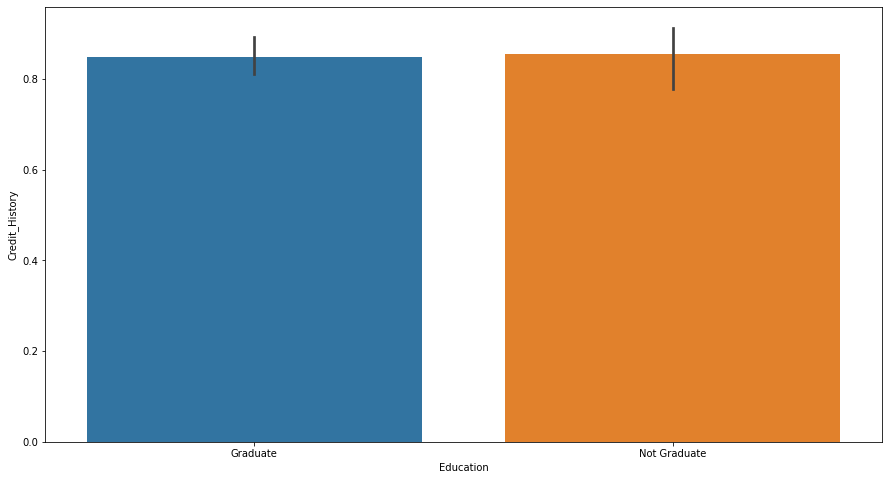

In [80]:
sns.barplot(x= 'Education', y= 'Credit_History', data= df1)

## Encoding the Categorical Variable

In [27]:
df1['Loan_Status'] = df1['Loan_Status'].replace('N',0)
df1['Loan_Status'] = df1['Loan_Status'].replace('Y',1)

## Scaling The Dataset

In [28]:
df_target = df1['Loan_Status']
df_feature = df1.drop('Loan_Status', axis= 1)

In [29]:
df_num = df_feature.select_dtypes(include= 'number')
df_num.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [30]:
df_cat = df_feature.select_dtypes(include= 'object')
df_cat.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [31]:
dummy_var = pd.get_dummies(data= df_cat, drop_first= True)
dummy_var

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,0
1,1,1,0,1,0,1
2,1,1,1,0,0,1
3,1,0,0,0,0,1
4,1,1,1,0,0,1
5,1,1,0,0,0,1
6,1,1,0,0,0,1
7,1,0,0,0,0,0
8,1,1,0,0,0,1
9,1,0,0,0,0,1


In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

num_scaled = ss.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns= df_num.columns)

In [33]:
X = pd.concat([df_num_scaled, dummy_var], axis= 1)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.337948,0.707469,0.098695,0.812575,0.275147,0.419435,1,1,0,0,0,0
1,-0.675895,-0.408932,-0.546371,-1.376596,0.275147,0.419435,1,1,0,1,0,1
2,-0.675895,-0.703019,0.462294,0.530102,0.275147,0.419435,1,1,1,0,0,1
3,-0.675895,1.706799,-0.546371,1.271595,0.275147,0.419435,1,0,0,0,0,1
4,-0.675895,-0.879330,0.102118,-0.352629,0.275147,0.419435,1,1,1,0,0,1


## Splitting The Dataset

In [34]:
import statsmodels
import statsmodels.api as sm

In [35]:
from sklearn.model_selection import train_test_split

xc = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(xc, df_target, test_size= 0.2, random_state= 1)

In [36]:
X_train.shape

(304, 13)

In [37]:
X_test.shape

(77, 13)

In [38]:
y_train.shape

(304,)

In [39]:
y_test.shape

(77,)

## Building a Base Model

In [40]:
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.401767
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  304
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                           12
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.3504
Time:                        17:08:08   Log-Likelihood:                -122.14
converged:                       True   LL-Null:                       -188.01
Covariance Type:            nonrobust   LLR p-value:                 2.743e-22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0840      0.462      0.182      0.856      -0.821   

In [41]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

244   0.885422
180   0.804855
277   0.968449
185   0.019556
233   0.776791
dtype: float64

In [42]:
y_pred = [0 if x < 0.5 else 1 for x in y_pred_prob]

In [43]:
y_pred[0:5]

[1, 1, 1, 0, 1]

In [44]:
from matplotlib.colors import ListedColormap

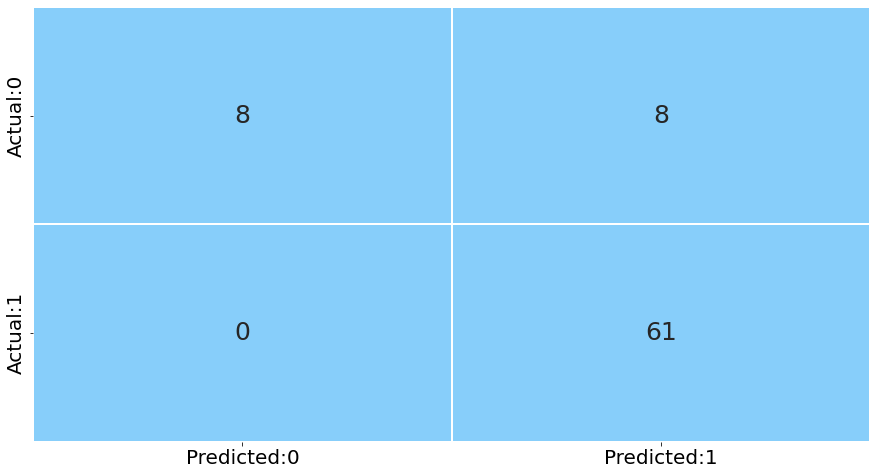

In [45]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data= cm, columns= ['Predicted:0','Predicted:1'], index= ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot= True, fmt= 'd', cmap= ListedColormap(['lightskyblue']), cbar= False, linewidths= 0.1, 
            annot_kws= {'size':25})

plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [46]:
logreg_ar = metrics.accuracy_score(y_test, y_pred)
logreg_ar

0.8961038961038961

In [47]:
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.88      1.00      0.94        61

    accuracy                           0.90        77
   macro avg       0.94      0.75      0.80        77
weighted avg       0.91      0.90      0.88        77



## Fine Tuning the Model

### 2. Decision Tree (Using Entropy)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [49]:
dt = DecisionTreeClassifier(criterion= 'entropy', random_state= 10)
dt = dt.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

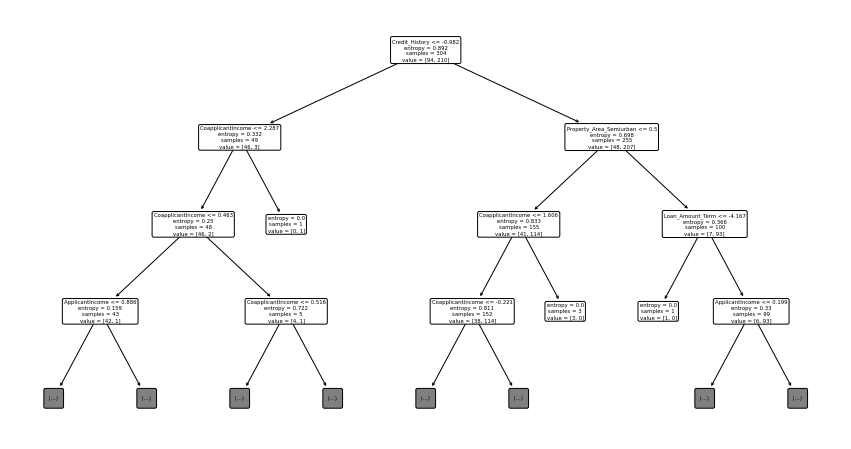

In [50]:
tree.plot_tree(dt, max_depth= 3, feature_names= X_train.columns, rounded= True)
plt.show

In [51]:
pred = dt.predict(X_test)

In [52]:
dt = metrics.accuracy_score(y_test, pred)
dt

0.7532467532467533

In [53]:
reports = metrics.classification_report(y_test, pred)
print(reports)

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        16
           1       0.86      0.82      0.84        61

    accuracy                           0.75        77
   macro avg       0.64      0.66      0.65        77
weighted avg       0.77      0.75      0.76        77



### 3. Decision Tree (Using Grid Search)

In [54]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,10),
                    'max_features':['sqrt','log2']}]

decision_tree_classificaton = DecisionTreeClassifier(random_state= 10)

tree_grid = GridSearchCV(estimator= decision_tree_classificaton,
                         param_grid= tuned_parameters,
                         cv= 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

In [55]:
dtt_model = DecisionTreeClassifier(criterion= tree_grid_model.best_params_.get('criterion'),
                                   max_depth= tree_grid_model.best_params_.get('max_depth'),
                                   max_features = tree_grid_model.best_params_.get('max_features'),
                                   random_state = 10)

dtt_model = dtt_model.fit(X_train, y_train)
dtt_model

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       random_state=10)

In [57]:
p = dtt_model.predict(X_test)

In [58]:
dtt_model_ar = metrics.accuracy_score(y_test, p)
dtt_model_ar

0.8961038961038961

In [59]:
reports = metrics.classification_report(y_test, p)
print(reports)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.88      1.00      0.94        61

    accuracy                           0.90        77
   macro avg       0.94      0.75      0.80        77
weighted avg       0.91      0.90      0.88        77



### 4. Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators= 10, random_state= 10)
rf_model = rf.fit(X_train, y_train)

In [61]:
pr = rf_model.predict(X_test)

In [62]:
rf_model_ar = metrics.accuracy_score(y_test, pr)
rf_model_ar

0.8441558441558441

In [63]:
reports = metrics.classification_report(y_test, pr)
print(reports)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.88      0.93      0.90        61

    accuracy                           0.84        77
   macro avg       0.77      0.72      0.74        77
weighted avg       0.83      0.84      0.84        77



### 5. Random Forest (Using Grid Search)

In [64]:
tuned_parameters = [{'criterion':['entropy','gini'],
                     'n_estimators':[10,30,50,70,90],
                     'max_depth':[10,15,20],
                     'max_features':['sqrt','log2'],
                     'min_samples_split':[2,5,8,11],
                     'min_samples_leaf':[1,5,9],
                     'max_leaf_nodes':[2,5,8,11]}]

random_forest_classification = RandomForestClassifier(random_state=10)

rf_grid = GridSearchCV(estimator = random_forest_classification,
                         param_grid=tuned_parameters,
                         cv=5)

rf_grid_model = rf_grid.fit(X_train,y_train)

print(rf_grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 90}


In [65]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'))
    
rff_model = rf_model.fit(X_train,y_train)

In [66]:
pre = rff_model.predict(X_test)

In [67]:
rff_model_ar = metrics.accuracy_score(y_test, pre)
rff_model_ar

0.8961038961038961

In [68]:
reports = metrics.classification_report(y_test, pre)
print(reports)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.88      1.00      0.94        61

    accuracy                           0.90        77
   macro avg       0.94      0.75      0.80        77
weighted avg       0.91      0.90      0.88        77



### 6. XGBoost Model

In [69]:
xg = XGBClassifier(learning_rate= 0.1, gamma= 3)

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
y_p = xg.predict(X_test)

In [71]:
xg_ar = metrics.accuracy_score(y_test, y_p)
xg_ar

0.8701298701298701

In [72]:
reports = metrics.classification_report(y_test, y_p)
print(reports)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.88      0.97      0.92        61

    accuracy                           0.87        77
   macro avg       0.84      0.73      0.77        77
weighted avg       0.86      0.87      0.86        77



### 7. XGBoost Model (Using GridSearch)

In [73]:
tuning_parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                     'max_depth':range(3,10),
                     'gamma':[0,1,2,3,4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator= xgb_model, param_grid= tuning_parameters, cv= 3, scoring= 'accuracy')

xgb_grid.fit(X_train, y_train)

print('Best Parameters for XGBoost Classifier: ', xgb_grid.best_params_, '\n')

Best Parameters for XGBoost Classifier:  {'gamma': 3, 'learning_rate': 0.6, 'max_depth': 3} 



In [74]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                               gamma = xgb_grid.best_params_.get('gamma'))

xgb_mod = xgb_grid_model.fit(X_train, y_train)

In [75]:
pr = xgb_mod.predict(X_test)

In [76]:
xgb_mod_ar = metrics.accuracy_score(y_test, pr)
xgb_mod_ar

0.8571428571428571

In [77]:
reports = metrics.classification_report(y_test, pr)
print(reports)

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.88      0.95      0.91        61

    accuracy                           0.86        77
   macro avg       0.80      0.73      0.75        77
weighted avg       0.85      0.86      0.85        77



## Comparing the Models

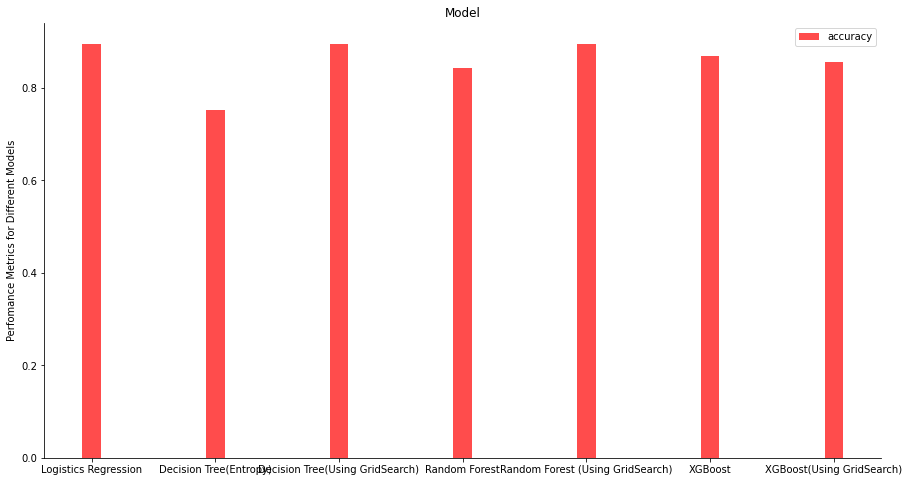

In [78]:
ax = plt.subplot(111)

models = ['Logistics Regression', 'Decision Tree(Entropy)','Decision Tree(Using GridSearch)','Random Forest', 'Random Forest (Using GridSearch)', 'XGBoost', 'XGBoost(Using GridSearch)']

values = [logreg_ar,dt,dtt_model_ar,rf_model_ar, rff_model_ar, xg_ar, xgb_mod_ar]

model = np.arange(len(models))

plt.bar(model, values, align= 'center', width= 0.15, alpha= 0.7, color= 'red', label= 'accuracy')
plt.xticks(model, models)

plt.ylabel('Perfomance Metrics for Different Models')
plt.title('Model')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

## Plotting the Important Features

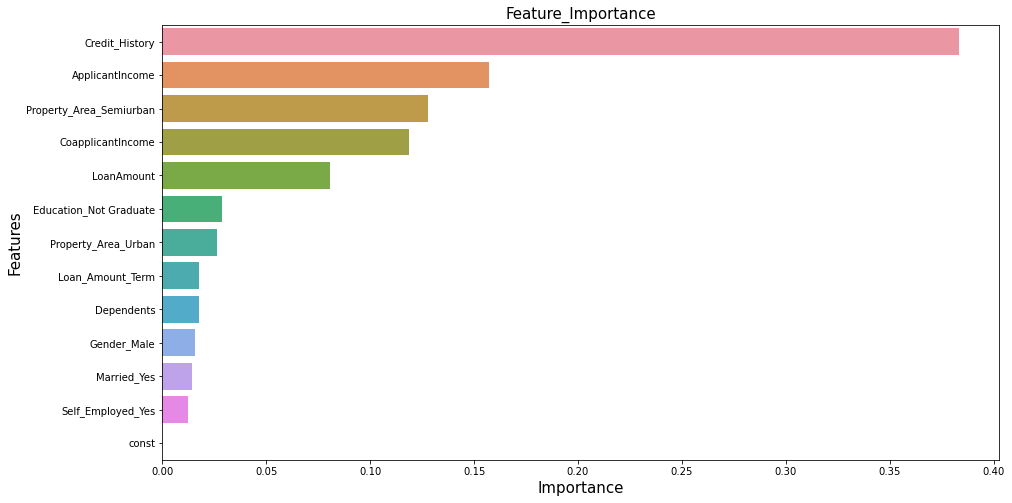

In [79]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rff_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending= False)

sns.barplot(x='Importance',y='Features',data=important_features)

plt.title('Feature_Importance',fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)

plt.show()

In [ ]:
# From the Above plot we can see that the feature affecting the target variable is Credit History. So, basically if you have a
# good credit history then that person has the most chances of getting a loan